In [414]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sdv.evaluation.multi_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns
from sdv.evaluation.multi_table import evaluate_quality
from sdv.metadata import SingleTableMetadata
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [423]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(model, X_train, y_train, X_test, y_test,train, regression=True):
    if regression:
        if train:
            y_pred_train = model.predict(X_train)
            mae_train = mean_absolute_error(y_train, y_pred_train)
            mse_train = mean_squared_error(y_train, y_pred_train)
            rmse_train = np.sqrt(mse_train)
            r2_train = r2_score(y_train, y_pred_train)

            print("Train Result:\n================================================")
            print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
            print(f"Mean Squared Error (MSE): {mse_train:.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
            print(f"R-squared (R2): {r2_train:.2f}")
        else:
            y_pred_test = model.predict(X_test)
            mae_test = mean_absolute_error(y_test, y_pred_test)
            mse_test = mean_squared_error(y_test, y_pred_test)
            rmse_test = np.sqrt(mse_test)
            r2_test = r2_score(y_test, y_pred_test)

            print("Test Result:\n================================================")
            print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
            print(f"Mean Squared Error (MSE): {mse_test:.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
            print(f"R-squared (R2): {r2_test:.2f}")
    else:
        if train:
            pred = model.predict(X_train)
            clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
            print("Train Result:\n================================================")
            print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
            print("_______________________________________________")
            print(f"CLASSIFICATION REPORT:\n{clf_report}")
            print("_______________________________________________")
            print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        else:
            pred = model.predict(X_test)
            clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
            print("Test Result:\n================================================")        
            print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
            print("_______________________________________________")
            print(f"CLASSIFICATION REPORT:\n{clf_report}")
            print("_______________________________________________")
            print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [61]:
data = pd.read_excel('wagesmicrodata.xls', sheet_name="Data")

In [62]:
data.iloc[0,:]=np.nan
data = data.dropna()
data.set_index('ID', inplace=True)

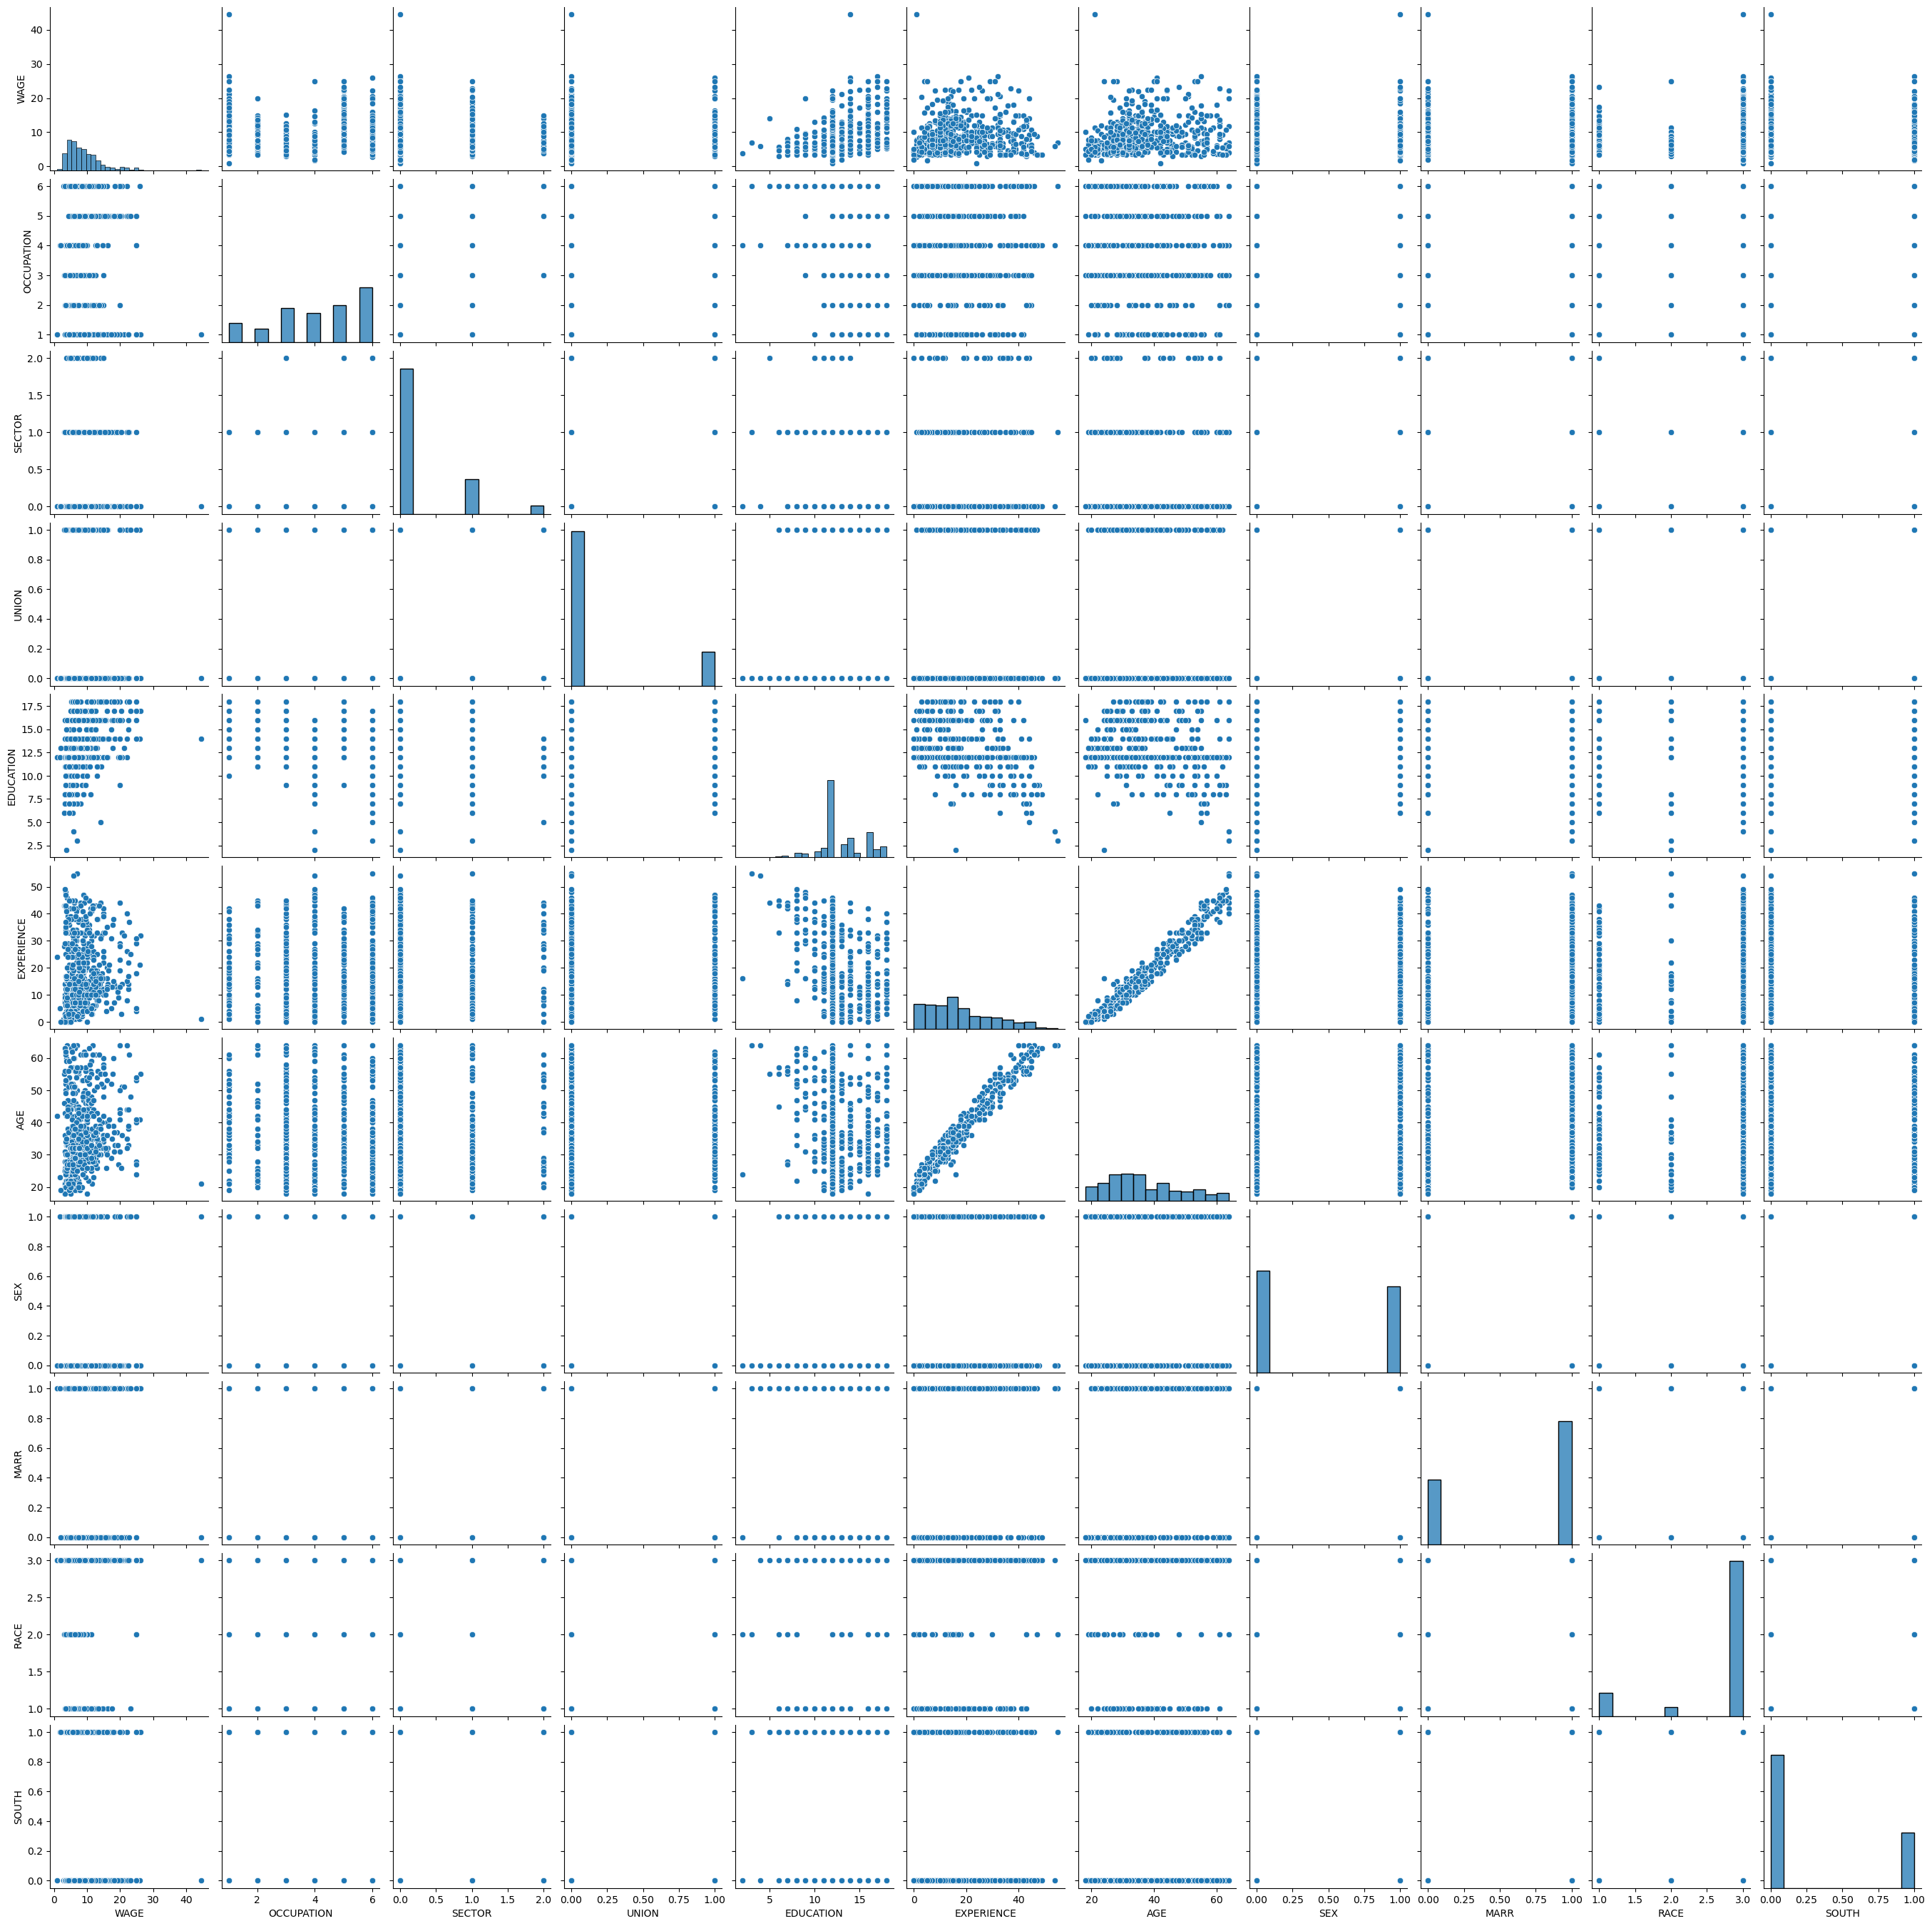

In [45]:
sns.pairplot(df)

In [46]:
df.shape

(533, 11)

In [54]:
mu = df.WAGE.mean()
std = df.WAGE.std()
std

5.141105085178399

In [55]:
df.columns

Index(['WAGE', 'OCCUPATION', 'SECTOR', 'UNION', 'EDUCATION', 'EXPERIENCE',
       'AGE', 'SEX', 'MARR', 'RACE', 'SOUTH'],
      dtype='object')

In [74]:
metadata = SingleTableMetadata()
md = metadata.detect_from_dataframe(data=data)

In [130]:
python_dict = metadata.to_dict()
metadata.update_column(
    column_name='OCCUPATION',
    sdtype='categorical')
metadata.update_column(
    column_name='SECTOR',
    sdtype='categorical')
metadata.update_column(
    column_name='UNION',
    sdtype='categorical')
metadata.update_column(
    column_name='SEX',
    sdtype='categorical')
metadata.update_column(
    column_name='MARR',
    sdtype='categorical')
metadata.update_column(
    column_name='SOUTH',
    sdtype='categorical')
metadata.update_column(
    column_name='RACE',
    sdtype='categorical')

python_dict

{'columns': {'WAGE': {'sdtype': 'numerical'},
  'OCCUPATION': {'sdtype': 'categorical'},
  'SECTOR': {'sdtype': 'categorical'},
  'UNION': {'sdtype': 'categorical'},
  'EDUCATION': {'sdtype': 'categorical'},
  'EXPERIENCE': {'sdtype': 'numerical'},
  'AGE': {'sdtype': 'numerical'},
  'SEX': {'sdtype': 'categorical'},
  'MARR': {'sdtype': 'categorical'},
  'RACE': {'sdtype': 'categorical'},
  'SOUTH': {'sdtype': 'categorical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}

In [131]:
synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    
    default_distribution='norm'
)
synthesizer.fit(data)

In [132]:
synthesizer.get_learned_distributions()

{'WAGE': {'distribution': 'norm',
  'learned_parameters': {'loc': 9.024063670411985,
   'scale': 5.134282710831919}},
 'OCCUPATION': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.497409964665976,
   'scale': 0.2899589827559288}},
 'SECTOR': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.4988613234126087,
   'scale': 0.28914192889836904}},
 'UNION': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.5076207924787737,
   'scale': 0.28465129995374255}},
 'EDUCATION': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.49730557401468145,
   'scale': 0.2896595352561925}},
 'EXPERIENCE': {'distribution': 'norm',
  'learned_parameters': {'loc': 17.822097378277153,
   'scale': 12.368113167187632}},
 'AGE': {'distribution': 'norm',
  'learned_parameters': {'loc': 36.833333333333336,
   'scale': 11.715587640310778}},
 'SEX': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.49308160544801444,
   'scale': 0.27909861577785383}},
 'MARR': {'distribut

In [133]:
synthetic_data = synthesizer.sample(
    num_rows=100_000,
    batch_size=1_000
)

Sampling rows: 100%|█████████████████████████████████████████████████████████| 100000/100000 [00:13<00:00, 7637.65it/s]


In [134]:
synthetic_data.WAGE.mean()

9.12700085967501

In [139]:
synthetic_data

,WAGE,OCCUPATION,SECTOR,UNION,EDUCATION,EXPERIENCE,AGE,SEX,MARR,RACE,SOUTH
0,14.396098,6,0,0,14,27.140328,47.438502,0,1,3,0
1,1.195062,3,0,0,12,0.0,18.0,0,0,3,0
2,11.259423,6,0,1,16,0.0,18.0,0,1,3,0
3,3.22723,5,1,0,12,35.654671,49.817774,1,1,3,0
4,9.140393,2,0,0,12,14.328613,30.656296,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,8.710428,6,0,0,16,9.953492,29.487614,0,0,3,0
99996,5.918955,4,0,0,16,11.850167,31.174002,0,1,3,1
99997,13.859545,6,0,0,12,25.269983,43.755199,1,1,1,0
99998,19.597882,5,0,0,12,24.643933,46.654012,0,0,3,0


In [135]:
diagnostic_report = run_diagnostic(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.88it/s]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data


C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


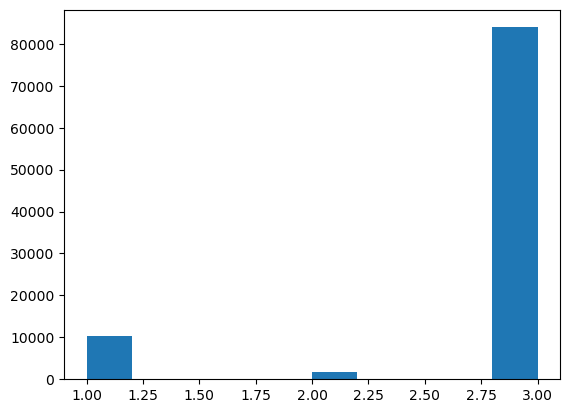

In [140]:
plt.hist(synthetic_data.RACE)
plt.show()

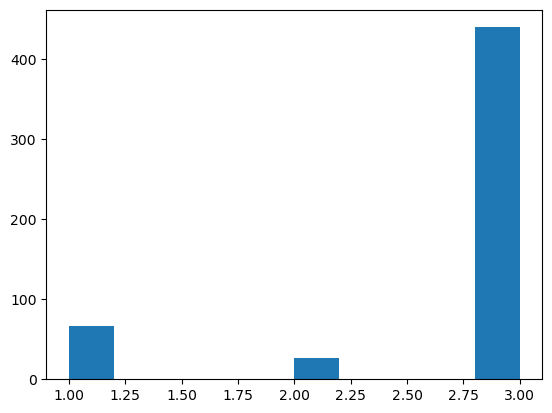

In [141]:
plt.hist(data.RACE)
plt.show()

In [159]:
synthetic_data

,WAGE,OCCUPATION,SECTOR,UNION,EDUCATION,EXPERIENCE,AGE,SEX,MARR,RACE,SOUTH
0,14.396098,6,0,0,14,27.140328,47.438502,0,1,3,0
1,1.195062,3,0,0,12,0.0,18.0,0,0,3,0
2,11.259423,6,0,1,16,0.0,18.0,0,1,3,0
3,3.22723,5,1,0,12,35.654671,49.817774,1,1,3,0
4,9.140393,2,0,0,12,14.328613,30.656296,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,8.710428,6,0,0,16,9.953492,29.487614,0,0,3,0
99996,5.918955,4,0,0,16,11.850167,31.174002,0,1,3,1
99997,13.859545,6,0,0,12,25.269983,43.755199,1,1,1,0
99998,19.597882,5,0,0,12,24.643933,46.654012,0,0,3,0


In [155]:
categorical_columns = []
for col in data.columns:
    if data[col].dtype == object and len (data[col].unique())<= 30: 
        categorical_columns.append(col)
categorical_columns

['OCCUPATION', 'SECTOR', 'UNION', 'EDUCATION', 'SEX', 'MARR', 'RACE', 'SOUTH']

In [168]:
sdf = synthetic_data 
sdf.columns

Index(['WAGE', 'OCCUPATION', 'SECTOR', 'UNION', 'EDUCATION', 'EXPERIENCE',
       'AGE', 'SEX', 'MARR', 'RACE', 'SOUTH'],
      dtype='object')

In [161]:
Y = synthetic_data['WAGE']
Y

0        14.396098
1         1.195062
2        11.259423
3          3.22723
4         9.140393
           ...    
99995     8.710428
99996     5.918955
99997    13.859545
99998    19.597882
99999     9.253423
Name: WAGE, Length: 100000, dtype: object

Mean Absolute Error: 2.8053073058023967


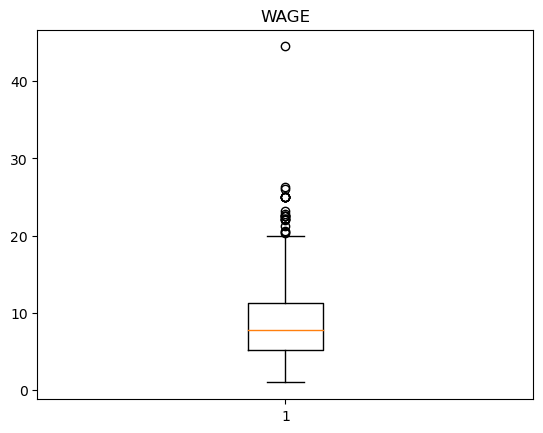

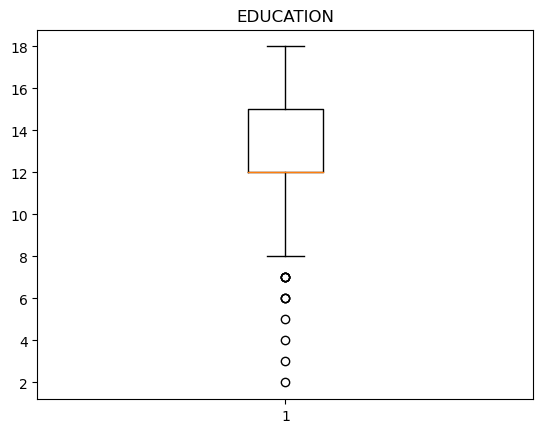

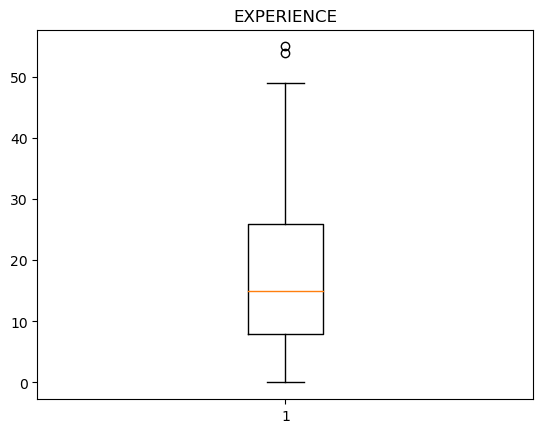

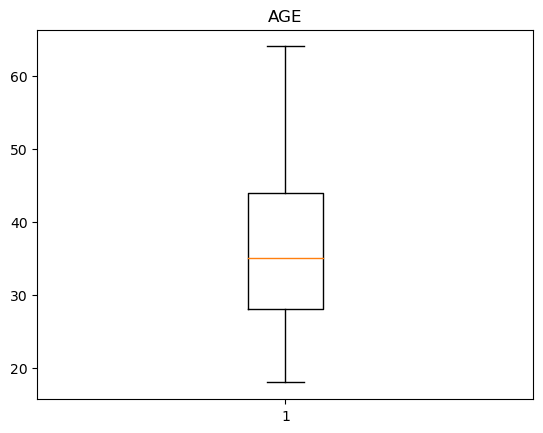

In [254]:
#boxplots 

numerical=[]
for i in df.columns : 
    if (sdf[i].unique().sum() >21):
        numerical.append(i)
for i in numerical: 
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    

<AxesSubplot:>

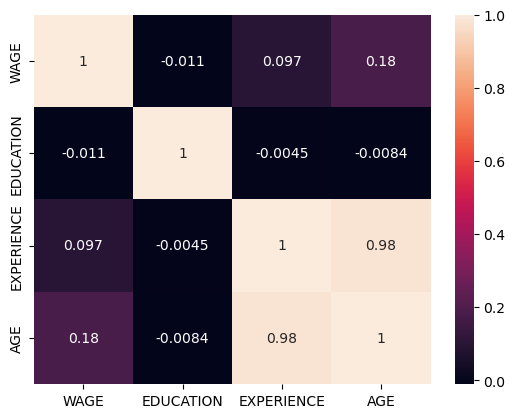

In [273]:
corr_matrix = sdf[numerical].corr()
sdf.WAGE = sdf.WAGE.astype('float')
sdf.EDUCATION = sdf.EDUCATION.astype('float')
sdf.EXPERIENCE = sdf.EXPERIENCE.astype('float')
sdf.AGE = sdf.AGE.astype('float')

# Create a heatmap
sns.heatmap(sdf[numerical].corr(), annot=True)

In [306]:
synthetic_data.describe()


,WAGE,OCCUPATION,SECTOR,UNION,EDUCATION,EXPERIENCE,AGE,SEX,MARR,RACE,SOUTH
count,100000.0,95628,95678,96166,95757,100000.0,100000.0,96126,95942,95983,95537
unique,94052.0,6,3,2,17,92355.0,93499.0,2,2,3,2
top,1.0,3,0,0,12,0.0,18.0,0,1,3,0
freq,5949.0,24017,80517,82573,38996,7494.0,5492.0,54927,67075,83950,72416


In [403]:

def calculate_iv_woe(df, feature, target_variable):
    df = df[[feature, target_variable]].copy()
    total_count = df.groupby(feature)[target_variable].count()

    positive_count = df.groupby(feature)[target_variable].sum()

    negative_count = total_count - positive_count
    positive_rate = positive_count / df[target_variable].sum()

    negative_rate = negative_count / (df.shape[0] - df[target_variable].sum())
    epsilon = 1e-10
    positive_rate = np.maximum(positive_rate, epsilon)
    negative_rate = np.maximum(negative_rate, epsilon)
    
    woe = np.log(positive_rate / negative_rate)
    
    iv = np.sum((positive_rate - negative_rate) * woe)
    
    return iv, woe


iv, woe = calculate_iv_woe(sdf,'OCCUPATION', 'WAGE')
iv
woe

OCCUPATION
1    0.002836
2    0.001079
3   -0.000544
4   -0.003638
5   -0.006991
6    0.007378
Name: WAGE, dtype: float64

<AxesSubplot:>

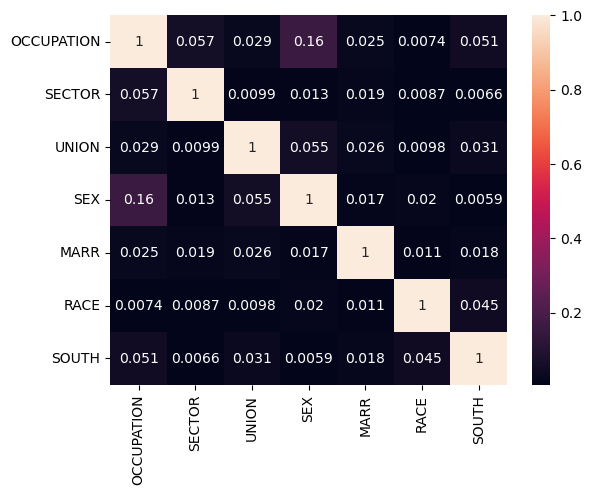

In [344]:
n_cols = len(cdf.columns)
cramer_v_matrix = np.zeros((n_cols, n_cols))
for i in range(len(cdf.columns)):
    for j in range(i, len(cdf.columns)):
        contingency_table = pd.crosstab(cdf.iloc[:, i], cdf.iloc[:, j])
        
        chi2, _, _, _ = chi2_contingency(contingency_table)
        
        n = contingency_table.sum().sum()
        k = contingency_table.shape[0]
        r = contingency_table.shape[1]
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))
        
        cramer_v_matrix[i, j] = cramers_v
        cramer_v_matrix[j, i] = cramers_v

cramer_v_df = pd.DataFrame(cramer_v_matrix, columns=cdf.columns, index=cdf.columns)

sns.heatmap(cramer_v_df,annot=True)

In [419]:
sdf

,WAGE,OCCUPATION,SECTOR,UNION,EDUCATION,EXPERIENCE,AGE,SEX,MARR,RACE,SOUTH
0,14.396098,6,0,0,14.0,27.140328,47.438502,0,1,3,0
1,1.195062,3,0,0,12.0,0.000000,18.000000,0,0,3,0
2,11.259423,6,0,1,16.0,0.000000,18.000000,0,1,3,0
3,3.227230,5,1,0,12.0,35.654671,49.817774,1,1,3,0
4,9.140393,2,0,0,12.0,14.328613,30.656296,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,8.710428,6,0,0,16.0,9.953492,29.487614,0,0,3,0
99996,5.918955,4,0,0,16.0,11.850167,31.174002,0,1,3,1
99997,13.859545,6,0,0,12.0,25.269983,43.755199,1,1,1,0
99998,19.597882,5,0,0,12.0,24.643933,46.654012,0,0,3,0


In [570]:
from sklearn.model_selection import train_test_split
sdf=sdf.dropna()
selected_columns = ['OCCUPATION', 'SECTOR', 'UNION', 'SEX', 'MARR', 'RACE', 'SOUTH','AGE']
X = sdf[selected_columns]
y = sdf['WAGE']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state=448842)
rf_model = RandomForestRegressor(n_estimators=1, random_state=42422)
rf_model.fit(X_train, y_train.values.reshape(-1,1))

# For training data evaluation (regression)
print_score(rf_model, X_train, y_train.values.reshape(-1, 1), X_test, y_test.values.reshape(-1, 1), regression=True, train=True)

# For testing data evaluation (regression)
print_score(rf_model, X_train, y_train.values.reshape(-1, 1), X_test, y_test.values.reshape(-1, 1), regression=True, train=False)


C:\Users\zgcha\AppData\Local\Temp\ipykernel_12004\2362908628.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train.values.reshape(-1,1))


Train Result:
Mean Absolute Error (MAE): 2.05
Mean Squared Error (MSE): 16.36
Root Mean Squared Error (RMSE): 4.05
R-squared (R2): 0.30
Test Result:
Mean Absolute Error (MAE): 5.25
Mean Squared Error (MSE): 43.22
Root Mean Squared Error (RMSE): 6.57
R-squared (R2): -0.88


In [406]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1,1))



ValueError: Found input variables with inconsistent numbers of samples: [612090, 68010]

Text(0.5, 1.0, 'median Wage:8.99')

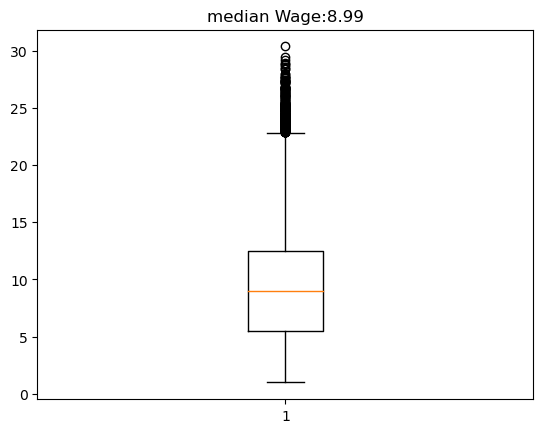

In [362]:
plt.boxplot(synthetic_data.WAGE)
plt.title('median Wage:'+str( round(np.median(synthetic_data.WAGE),2)))

In [370]:
nndf = synthetic_data.copy()
median_wage = np.median(nndf['WAGE'])
nndf['Target'] = np.where(nndf['WAGE'] > median_wage, 1, 0)
nndf



,WAGE,OCCUPATION,SECTOR,UNION,EDUCATION,EXPERIENCE,AGE,SEX,MARR,RACE,SOUTH,Target
0,14.396098,6,0,0,14,27.140328,47.438502,0,1,3,0,1
1,1.195062,3,0,0,12,0.0,18.0,0,0,3,0,0
2,11.259423,6,0,1,16,0.0,18.0,0,1,3,0,1
3,3.22723,5,1,0,12,35.654671,49.817774,1,1,3,0,0
4,9.140393,2,0,0,12,14.328613,30.656296,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8.710428,6,0,0,16,9.953492,29.487614,0,0,3,0,0
99996,5.918955,4,0,0,16,11.850167,31.174002,0,1,3,1,0
99997,13.859545,6,0,0,12,25.269983,43.755199,1,1,1,0,1
99998,19.597882,5,0,0,12,24.643933,46.654012,0,0,3,0,1


In [412]:

nndf = nndf.dropna()
X = nndf.drop('Target', axis=1)
y = nndf['Target']
y = y.values.reshape(-1, 1)
logistic_regression_model = LogisticRegression()

n_folds = 5  # You can adjust this number

cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=43842)

accuracy_scores = cross_val_score(logistic_regression_model, X, y.ravel(), cv=cv, scoring='accuracy')

for fold, accuracy in enumerate(accuracy_scores, 1):
    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")

logistic_regression_model.fit(X, y)
y_pred = logistic_regression_model.predict(X)

classification_rep = classification_report(y, y_pred)

print("Classification Report on Entire Dataset:\n", classification_rep)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Accuracy: 0.5917
Fold 2 Accuracy: 0.5884
Fold 3 Accuracy: 0.5964
Fold 4 Accuracy: 0.5877
Fold 5 Accuracy: 0.5886
Mean Accuracy: 0.5906


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report on Entire Dataset:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57     35018
           1       0.60      0.63      0.61     36572

    accuracy                           0.59     71590
   macro avg       0.59      0.59      0.59     71590
weighted avg       0.59      0.59      0.59     71590



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [437]:
nndf

,OCCUPATION,SECTOR,UNION,EDUCATION,AGE,SEX,MARR,RACE,SOUTH,Target
0,6,0,0,14,47.438502,0,1,3,0,1
1,3,0,0,12,18.0,0,0,3,0,0
2,6,0,1,16,18.0,0,1,3,0,1
3,5,1,0,12,49.817774,1,1,3,0,0
4,2,0,0,12,30.656296,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,6,0,0,16,29.487614,0,0,3,0,0
99996,4,0,0,16,31.174002,0,1,3,1,0
99997,6,0,0,12,43.755199,1,1,1,0,1
99998,5,0,0,12,46.654012,0,0,3,0,1


In [569]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
nndf = nndf.dropna()
X = nndf.drop('Target', axis=1)
y = nndf['Target']
y = y.values.reshape(-1, 1)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order to see the most predictive features first
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most predictive features (you can change N to the desired number)
top_n_features = sorted_feature_importance_df.head(5)
print(top_n_features)


C:\Users\zgcha\AppData\Local\Temp\ipykernel_12004\675940458.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)


      Feature  Importance
4         AGE    0.637323
0  OCCUPATION    0.121932
3   EDUCATION    0.075637
1      SECTOR    0.042509
6        MARR    0.034405


In [439]:
X

,OCCUPATION,SECTOR,UNION,EDUCATION,AGE,SEX,MARR,RACE,SOUTH
0,6,0,0,14,47.438502,0,1,3,0
1,3,0,0,12,18.0,0,0,3,0
2,6,0,1,16,18.0,0,1,3,0
3,5,1,0,12,49.817774,1,1,3,0
4,2,0,0,12,30.656296,0,1,3,0
...,...,...,...,...,...,...,...,...,...
99995,6,0,0,16,29.487614,0,0,3,0
99996,4,0,0,16,31.174002,0,1,3,1
99997,6,0,0,12,43.755199,1,1,1,0
99998,5,0,0,12,46.654012,0,0,3,0


Most Predictive Variables for Decile 0:

EXPERIENCE: 0.3253
AGE: 0.3245
OCCUPATION: 0.0963
EDUCATION: 0.0883
MARR: 0.0371
SOUTH: 0.0330
SECTOR: 0.0329
RACE: 0.0241
UNION: 0.0211
SEX: 0.0174


Most Predictive Variables for Decile 1:

AGE: 0.3394
EXPERIENCE: 0.3184
OCCUPATION: 0.0909
EDUCATION: 0.0845
SECTOR: 0.0359
SOUTH: 0.0322
MARR: 0.0277
RACE: 0.0247
SEX: 0.0232
UNION: 0.0231


Most Predictive Variables for Decile 2:

AGE: 0.3246
EXPERIENCE: 0.3127
EDUCATION: 0.1028
OCCUPATION: 0.0838
SEX: 0.0341
MARR: 0.0323
SECTOR: 0.0321
SOUTH: 0.0278
RACE: 0.0267
UNION: 0.0231


Most Predictive Variables for Decile 3:

AGE: 0.3136
EXPERIENCE: 0.3093
EDUCATION: 0.1062
OCCUPATION: 0.0914
MARR: 0.0335
SEX: 0.0327
SECTOR: 0.0317
SOUTH: 0.0290
UNION: 0.0263
RACE: 0.0262


Most Predictive Variables for Decile 4:

EXPERIENCE: 0.3159
AGE: 0.3133
EDUCATION: 0.1151
OCCUPATION: 0.0926
SECTOR: 0.0335
SOUTH: 0.0287
RACE: 0.0279
UNION: 0.0268
SEX: 0.0245
MARR: 0.0217


Most Predictive Variables for Decile 5:


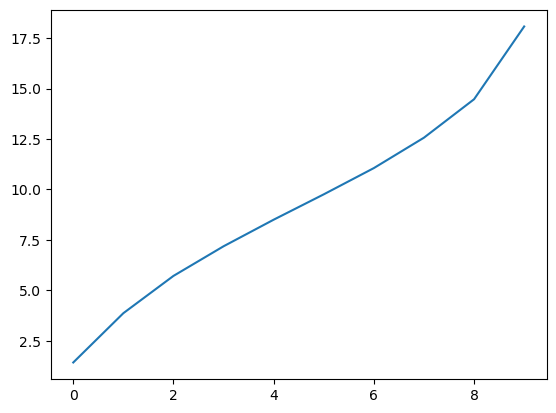

In [486]:
nnndf = sdf.copy()
nnndf= nnndf.dropna()
WAGE_Deciles = pd.qcut(nnndf.WAGE,10, labels=False)
nnndf['WAGE_DECILE']=WAGE_Deciles
average_wage_per_decile = nnndf.groupby('WAGE_DECILE')['WAGE'].mean().reset_index()
plt.plot(average_wage_per_decile.iloc[:,1])

deciles = range(10)
ft_importance_pr_dec={}
for decile in deciles :
    ndec=nnndf[nnndf['WAGE_DECILE']==decile]
    X_DEC = ndec.drop(['WAGE','WAGE_DECILE'], axis=1)
    y_dec = ndec['WAGE']
    
    rf_model = RandomForestRegressor(n_estimators=10, random_state=4323)
    rf_model.fit(X_DEC, y_dec)
    
    feature_importances = rf_model.feature_importances_ 
    ft_importance_pr_dec[decile] = list(zip(X_DEC.columns, feature_importances))


for decile, importance_list in ft_importance_pr_dec.items():
    print(f"Most Predictive Variables for Decile {decile}:\n")
    sorted_importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)
    for feature, importance in sorted_importance_list:
        print(f"{feature}: {importance:.4f}")
    print("\n")

In [489]:
ft_importance_pr_dec

{0: [('OCCUPATION', 0.09629468034116377),
  ('SECTOR', 0.03291880962426265),
  ('UNION', 0.021055671002575736),
  ('EDUCATION', 0.08833819683727746),
  ('EXPERIENCE', 0.3253015111600963),
  ('AGE', 0.32453260052862853),
  ('SEX', 0.017410561182547378),
  ('MARR', 0.037112783775469935),
  ('RACE', 0.024079493299620055),
  ('SOUTH', 0.03295569224835813)],
 1: [('OCCUPATION', 0.09086350888798486),
  ('SECTOR', 0.03591162440552375),
  ('UNION', 0.023137784835367266),
  ('EDUCATION', 0.08447148132655206),
  ('EXPERIENCE', 0.31838925781916755),
  ('AGE', 0.3394241258827495),
  ('SEX', 0.02320758000642835),
  ('MARR', 0.027718481413876332),
  ('RACE', 0.02466509513652824),
  ('SOUTH', 0.03221106028582224)],
 2: [('OCCUPATION', 0.08378814950747811),
  ('SECTOR', 0.03207668102367463),
  ('UNION', 0.023068909468711787),
  ('EDUCATION', 0.10278341063675737),
  ('EXPERIENCE', 0.3127310210055488),
  ('AGE', 0.32456879527272775),
  ('SEX', 0.034129405694631514),
  ('MARR', 0.032315117930918645),
  (

In [562]:
decile_featur_imp = []

for decile, lis in ft_importance_pr_dec.items():
    for i in range(len(lis)):
        decile_featur_imp.append([decile, lis[i][0], lis[i][1]])

# Create the DataFrame 'decile_imp' from the collected data
decile_imp = pd.DataFrame(decile_featur_imp, columns=['decile', 'cat', 'imp'])

print(decile_imp.head())




   decile         cat       imp
0       0  OCCUPATION  0.096295
1       0      SECTOR  0.032919
2       0       UNION  0.021056
3       0   EDUCATION  0.088338
4       0  EXPERIENCE  0.325302


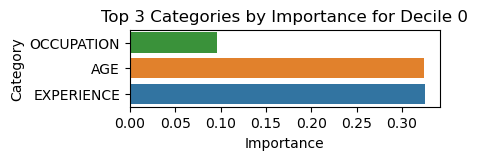

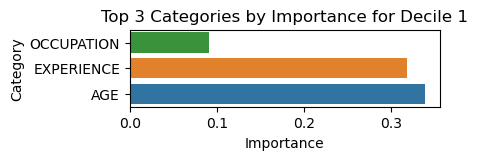

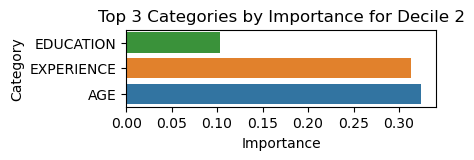

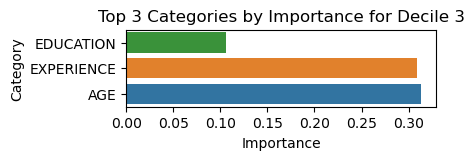

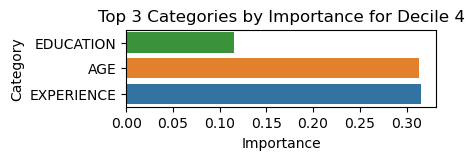

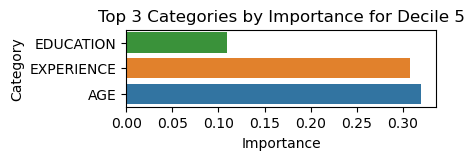

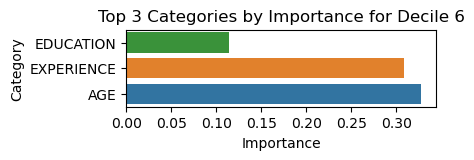

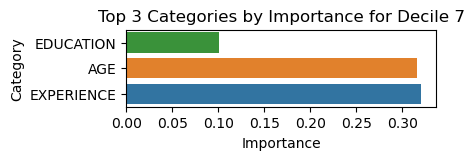

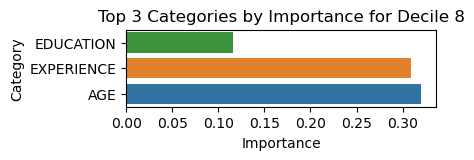

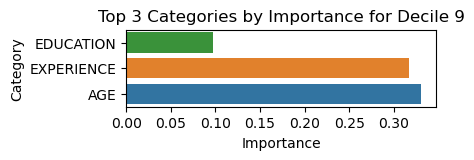

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'decile_imp' with columns 'decile', 'cat', and 'imp'

# Define the number of top categories to plot
top_n_categories = 3

# Initialize a list to store the plots
plots = []

# Iterate through each decile
for decile in decile_imp['decile'].unique():
    decile_data = decile_imp[decile_imp['decile'] == decile]
    
    sorted_categories = decile_data.sort_values(by='imp', ascending=False)
    
    top_categories = sorted_categories.head(top_n_categories)
    
    plt.figure(figsize=(4, 1))
    sns.barplot(x='imp', y='cat', data=top_categories, orient='h')
    plt.title(f'Top {top_n_categories} Categories by Importance for Decile {decile}')
    plt.xlabel('Importance')
    plt.ylabel('Category')
    plt.gca().invert_yaxis()  
    plots.append(plt)
    
# Show the plots
for plot in plots:
    plot.show()
